In [51]:
import netCDF4 as nc
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

In [53]:
level2_shi_ffn = '/g/data/rq0/level_2/66/SHI/66_20201031_shi.nc' #this is not an opendap path, this is a direct path on NCI.
request_lat = -27.501
request_lon = 152.971
request_radius = 10

In [62]:
with nc.Dataset(level2_shi_ffn) as ds:
    shi = ds.variables['shi'][:]
    lat = ds.variables['latitude'][:]
    lon = ds.variables['longitude'][:]
    x = ds.variables['x'][:] / 1000 #convert to km
    y = ds.variables['y'][:] / 1000 # convert to km
    x_grid, y_grid = np.meshgrid(x, y)

Maximum MESH was:  46.511806


(150.0, 200.0)

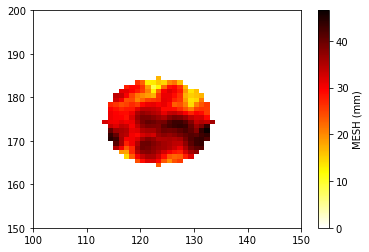

In [84]:
#calculate grid location closest to request
dist_deg = np.sqrt((lat-request_lat)**2 + (lon-request_lon)**2)
closest_index_array = np.where(dist_deg == np.min(dist_deg))
closest_index = (closest_index_array[0][0], closest_index_array[1][0])

#calculate all points within a radius of the closest point
dist_km = np.sqrt((x_grid-x_grid[closest_index])**2 + (y_grid-y_grid[closest_index])**2)
radius_outside = dist_km > request_radius

#apply mask to daily shi
max_daily_shi = np.max(shi, axis=0)
max_daily_shi[radius_outside] = 0
max_daily_mesh = 15.096 * max_daily_shi**0.206

#print maximum and plot
print('Maximum MESH was: ', np.max(max_daily_mesh))
im = plt.pcolor(max_daily_mesh, cmap='hot_r')
plt.colorbar(im, label='MESH (mm)')
plt.xlim([100,150])
plt.ylim([150,200])